In [ ]:
!pip install transformers
!pip install torch
!pip install sckikit-learn
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.0 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement sckikit-learn (from versions: none)
ERROR: No matching distribution found for sckikit-learn


# **Step 1: Importing Libraries**


In [ ]:
import transformers
import torch
import sklearn
import pandas as pd


# **Step 2: Importing Libraries**

In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
import torch
import torch.nn.functional as F
import torch.optim as optim


from google.colab import files

uploaded = files.upload()



file_name = "PUR_Consumer_Feedback_July_2023.xlsx" # Use the exact name of the uploaded file
data = pd.read_excel(file_name)









Saving PUR_Consumer_Feedback_July_2023.xlsx to PUR_Consumer_Feedback_July_2023.xlsx


# **Step 3: Inspect the Data**

In [ ]:
data.head()


,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,"On a scale of 1 to 10, how well does the PUR software help you do your job?",What is the main reason for your rating?,What is the best/worst change/feature added in the past 6 months?
0,NaN,NaN,NaT,NaT,NaN,NaN,Response,Open-Ended Response,Open-Ended Response
1,1.183862e+11,451942577.0,2023-08-03 09:48:07,2023-08-03 09:57:57,165.225.223.3,NaN,7,I use PUR in a supporting role. I use it for d...,Worst: The target start and finish dates
2,1.183862e+11,451942577.0,2023-08-03 09:18:50,2023-08-03 09:24:11,104.129.207.34,NaN,Extremely likely - 10,The new changes which were added to PUR makes ...,"Best Changes: Schedule tab changes, EOJC auto ..."
3,1.183862e+11,451942577.0,2023-08-03 08:56:17,2023-08-03 09:00:19,165.225.222.230,NaN,Extremely likely - 10,"Program does what it was designed to do, users...",I wish we would still have a field for the old...
4,1.183861e+11,451942577.0,2023-08-03 06:29:52,2023-08-03 06:33:48,165.225.37.9,NaN,5,There needs to be a formal training and an off...,"I wasn't aware of any updates recently. Again,..."


# **Step 4: Exploration Data**

In [ ]:
# Check the data types
data.dtypes

# Summary statistics for numerical columns
data.describe()

,Respondent ID,Collector ID,Email Address
count,1.350000e+02,135.0,0.0
mean,1.183806e+11,451942577.0,NaN
std,4.562630e+06,0.0,NaN
min,1.183737e+11,451942577.0,NaN
25%,1.183766e+11,451942577.0,NaN
50%,1.183801e+11,451942577.0,NaN
75%,1.183852e+11,451942577.0,NaN
max,1.183862e+11,451942577.0,NaN


# **Step 5: Clean the Data**

## *Step 1: Removing Unnecessary Columns*


In [ ]:
# List of columns to remove
columns_to_remove = ["Respondent ID", "Collector ID", "Email Address"]

# Remove the specified columns
cleaned_data = data.drop(columns=columns_to_remove)

# Display the first few rows to confirm the changes
cleaned_data.head()


,Start Date,End Date,IP Address,"On a scale of 1 to 10, how well does the PUR software help you do your job?",What is the main reason for your rating?,What is the best/worst change/feature added in the past 6 months?
0,NaT,NaT,NaN,Response,Open-Ended Response,Open-Ended Response
1,2023-08-03 09:48:07,2023-08-03 09:57:57,165.225.223.3,7,I use PUR in a supporting role. I use it for d...,Worst: The target start and finish dates
2,2023-08-03 09:18:50,2023-08-03 09:24:11,104.129.207.34,Extremely likely - 10,The new changes which were added to PUR makes ...,"Best Changes: Schedule tab changes, EOJC auto ..."
3,2023-08-03 08:56:17,2023-08-03 09:00:19,165.225.222.230,Extremely likely - 10,"Program does what it was designed to do, users...",I wish we would still have a field for the old...
4,2023-08-03 06:29:52,2023-08-03 06:33:48,165.225.37.9,5,There needs to be a formal training and an off...,"I wasn't aware of any updates recently. Again,..."


## *Step 2: Removing Duplicate Rows*

In [ ]:
# Remove duplicate rows (if any)
cleaned_data = cleaned_data.drop_duplicates()

# Display the first few rows to confirm the changes
cleaned_data.head()


,Start Date,End Date,IP Address,"On a scale of 1 to 10, how well does the PUR software help you do your job?",What is the main reason for your rating?,What is the best/worst change/feature added in the past 6 months?
0,NaT,NaT,NaN,Response,Open-Ended Response,Open-Ended Response
1,2023-08-03 09:48:07,2023-08-03 09:57:57,165.225.223.3,7,I use PUR in a supporting role. I use it for d...,Worst: The target start and finish dates
2,2023-08-03 09:18:50,2023-08-03 09:24:11,104.129.207.34,Extremely likely - 10,The new changes which were added to PUR makes ...,"Best Changes: Schedule tab changes, EOJC auto ..."
3,2023-08-03 08:56:17,2023-08-03 09:00:19,165.225.222.230,Extremely likely - 10,"Program does what it was designed to do, users...",I wish we would still have a field for the old...
4,2023-08-03 06:29:52,2023-08-03 06:33:48,165.225.37.9,5,There needs to be a formal training and an off...,"I wasn't aware of any updates recently. Again,..."


## *Step 3: Removing Unnecessary Rows*



In [ ]:
# Drop the first row (index 0) that is a placeholder
cleaned_data = cleaned_data.drop(index=0)

# Display the first few rows to confirm the changes
cleaned_data.head()


,Start Date,End Date,IP Address,"On a scale of 1 to 10, how well does the PUR software help you do your job?",What is the main reason for your rating?,What is the best/worst change/feature added in the past 6 months?
1,2023-08-03 09:48:07,2023-08-03 09:57:57,165.225.223.3,7,I use PUR in a supporting role. I use it for d...,Worst: The target start and finish dates
2,2023-08-03 09:18:50,2023-08-03 09:24:11,104.129.207.34,Extremely likely - 10,The new changes which were added to PUR makes ...,"Best Changes: Schedule tab changes, EOJC auto ..."
3,2023-08-03 08:56:17,2023-08-03 09:00:19,165.225.222.230,Extremely likely - 10,"Program does what it was designed to do, users...",I wish we would still have a field for the old...
4,2023-08-03 06:29:52,2023-08-03 06:33:48,165.225.37.9,5,There needs to be a formal training and an off...,"I wasn't aware of any updates recently. Again,..."
5,2023-08-02 17:28:48,2023-08-02 17:31:50,165.225.222.245,7,The system is hard to navigate.,No answer


In [ ]:
cleaned_data['Start Date'] = pd.to_datetime(cleaned_data['Start Date'])
cleaned_data['End Date'] = pd.to_datetime(cleaned_data['End Date'])


In [ ]:
cleaned_data['Time Spent'] = cleaned_data['End Date'] - cleaned_data['Start Date']


In [ ]:
cleaned_data.head()


,Start Date,End Date,IP Address,"On a scale of 1 to 10, how well does the PUR software help you do your job?",What is the main reason for your rating?,What is the best/worst change/feature added in the past 6 months?,Time Spent
1,2023-08-03 09:48:07,2023-08-03 09:57:57,165.225.223.3,7,I use PUR in a supporting role. I use it for d...,Worst: The target start and finish dates,0 days 00:09:50
2,2023-08-03 09:18:50,2023-08-03 09:24:11,104.129.207.34,Extremely likely - 10,The new changes which were added to PUR makes ...,"Best Changes: Schedule tab changes, EOJC auto ...",0 days 00:05:21
3,2023-08-03 08:56:17,2023-08-03 09:00:19,165.225.222.230,Extremely likely - 10,"Program does what it was designed to do, users...",I wish we would still have a field for the old...,0 days 00:04:02
4,2023-08-03 06:29:52,2023-08-03 06:33:48,165.225.37.9,5,There needs to be a formal training and an off...,"I wasn't aware of any updates recently. Again,...",0 days 00:03:56
5,2023-08-02 17:28:48,2023-08-02 17:31:50,165.225.222.245,7,The system is hard to navigate.,No answer,0 days 00:03:02


In [ ]:
cleaned_data = cleaned_data.drop(columns=['Start Date', 'End Date'])


In [ ]:
cleaned_data.head()

,IP Address,"On a scale of 1 to 10, how well does the PUR software help you do your job?",What is the main reason for your rating?,What is the best/worst change/feature added in the past 6 months?,Time Spent
1,165.225.223.3,7,I use PUR in a supporting role. I use it for d...,Worst: The target start and finish dates,0 days 00:09:50
2,104.129.207.34,Extremely likely - 10,The new changes which were added to PUR makes ...,"Best Changes: Schedule tab changes, EOJC auto ...",0 days 00:05:21
3,165.225.222.230,Extremely likely - 10,"Program does what it was designed to do, users...",I wish we would still have a field for the old...,0 days 00:04:02
4,165.225.37.9,5,There needs to be a formal training and an off...,"I wasn't aware of any updates recently. Again,...",0 days 00:03:56
5,165.225.222.245,7,The system is hard to navigate.,No answer,0 days 00:03:02


In [ ]:
cleaned_data['Time Spent (mins)'] = cleaned_data['Time Spent'].dt.total_seconds() / 60


cleaned_data.drop('Time Spent', axis=1, inplace=True)



In [ ]:
cleaned_data.head()


,IP Address,Score,What is the main reason for your rating?,What is the best/worst change/feature added in the past 6 months?,Time Spent (mins)
1,165.225.223.3,7,I use PUR in a supporting role. I use it for d...,Worst: The target start and finish dates,9.833333
2,104.129.207.34,10,The new changes which were added to PUR makes ...,"Best Changes: Schedule tab changes, EOJC auto ...",5.350000
3,165.225.222.230,10,"Program does what it was designed to do, users...",I wish we would still have a field for the old...,4.033333
4,165.225.37.9,5,There needs to be a formal training and an off...,"I wasn't aware of any updates recently. Again,...",3.933333
5,165.225.222.245,7,The system is hard to navigate.,No answer,3.033333


## *Step 4: Remove Non-Numeric Characters*

In [ ]:
cleaned_data['On a scale of 1 to 10, how well does the PUR software help you do your job?'] = cleaned_data['On a scale of 1 to 10, how well does the PUR software help you do your job?'].replace(r'\D', '', regex=True)


## *Step 5: Convert to Numeric Format*

In [ ]:
cleaned_data['On a scale of 1 to 10, how well does the PUR software help you do your job?'] = pd.to_numeric(cleaned_data['On a scale of 1 to 10, how well does the PUR software help you do your job?'])


## *Step 6: Rename the Column*

In [ ]:
cleaned_data = cleaned_data.rename(columns={'On a scale of 1 to 10, how well does the PUR software help you do your job?': 'Score'})


## *Step 7: Inspect the Data*

In [ ]:
cleaned_data.head()


,IP Address,Score,What is the main reason for your rating?,What is the best/worst change/feature added in the past 6 months?,Time Spent
1,165.225.223.3,7,I use PUR in a supporting role. I use it for d...,Worst: The target start and finish dates,0 days 00:09:50
2,104.129.207.34,10,The new changes which were added to PUR makes ...,"Best Changes: Schedule tab changes, EOJC auto ...",0 days 00:05:21
3,165.225.222.230,10,"Program does what it was designed to do, users...",I wish we would still have a field for the old...,0 days 00:04:02
4,165.225.37.9,5,There needs to be a formal training and an off...,"I wasn't aware of any updates recently. Again,...",0 days 00:03:56
5,165.225.222.245,7,The system is hard to navigate.,No answer,0 days 00:03:02


## *Step 8: Handling Missing Values*

In [ ]:
missing_values = cleaned_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns


What is the main reason for your rating?                               9
What is the best/worst change/feature added in the past 6 months?     36
dtype: int64

In [ ]:
cleaned_data = cleaned_data.fillna("n/a")


<ipython-input-22-6918d7dfd0f3>:1: FutureWarning: The behavior of fillna with timedelta64[ns] dtype and an incompatible value (<class 'str'>) is deprecated. In a future version, this will cast to a common dtype (usually object) instead of raising, matching the behavior of other dtypes.
  cleaned_data = cleaned_data.fillna("n/a")


TypeError: ignored

In [ ]:
cleaned_data.head()


,IP Address,Score,What is the main reason for your rating?,What is the best/worst change/feature added in the past 6 months?,Time Spent (mins)
1,165.225.223.3,7,I use PUR in a supporting role. I use it for d...,Worst: The target start and finish dates,9.833333
2,104.129.207.34,10,The new changes which were added to PUR makes ...,"Best Changes: Schedule tab changes, EOJC auto ...",5.350000
3,165.225.222.230,10,"Program does what it was designed to do, users...",I wish we would still have a field for the old...,4.033333
4,165.225.37.9,5,There needs to be a formal training and an off...,"I wasn't aware of any updates recently. Again,...",3.933333
5,165.225.222.245,7,The system is hard to navigate.,No answer,3.033333


In [ ]:
categorical_columns = [
    'What is the main reason for your rating?',
    'What is the best/worst change/feature added in the past 6 months? ' # Note the space at the end
]



In [ ]:
# List current columns
current_columns = cleaned_data.columns
current_columns



Index(['IP Address', 'Score', 'What is the main reason for your rating?',
       'What is the best/worst change/feature added in the past 6 months? ',
       'Time Spent (mins)'],
      dtype='object')

In [ ]:
non_categorical_columns = [col for col in cleaned_data.columns if col not in categorical_columns]
new_order = non_categorical_columns + categorical_columns
reordered_data = cleaned_data[new_order]



In [ ]:
reordered_data.head()


,IP Address,Score,Time Spent (mins),What is the main reason for your rating?,What is the best/worst change/feature added in the past 6 months?
1,165.225.223.3,7,9.833333,I use PUR in a supporting role. I use it for d...,Worst: The target start and finish dates
2,104.129.207.34,10,5.350000,The new changes which were added to PUR makes ...,"Best Changes: Schedule tab changes, EOJC auto ..."
3,165.225.222.230,10,4.033333,"Program does what it was designed to do, users...",I wish we would still have a field for the old...
4,165.225.37.9,5,3.933333,There needs to be a formal training and an off...,"I wasn't aware of any updates recently. Again,..."
5,165.225.222.245,7,3.033333,The system is hard to navigate.,No answer


## *Step 9: Handling Outliers*



In [ ]:
def parse_time_spent(time_str):
    minutes, seconds = map(int, time_str.replace(' mins,', '').replace(' secs', '').split())
    return minutes * 60 + seconds

reordered_data['Time Spent'] = reordered_data['Time Spent'].apply(parse_time_spent)


AttributeError: ignored

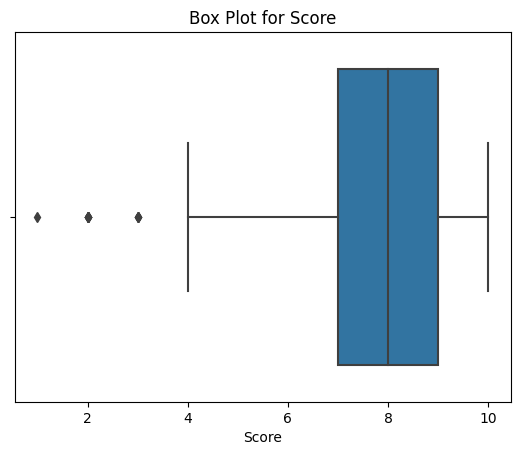

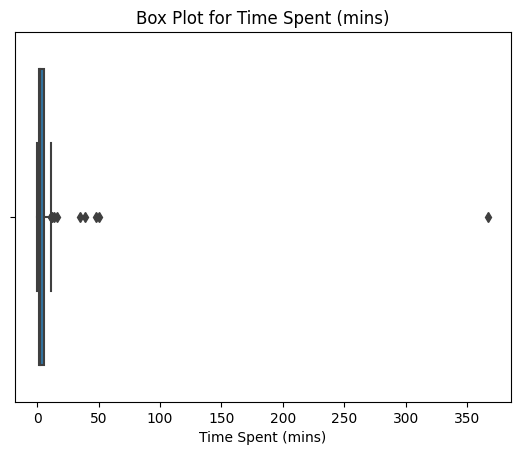

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in ['Score', 'Time Spent (mins)']:
    sns.boxplot(x=reordered_data[column])
    plt.title(f'Box Plot for {column}')
    plt.show()


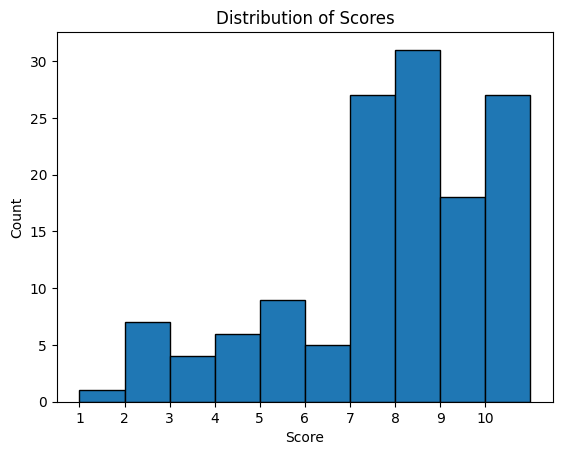

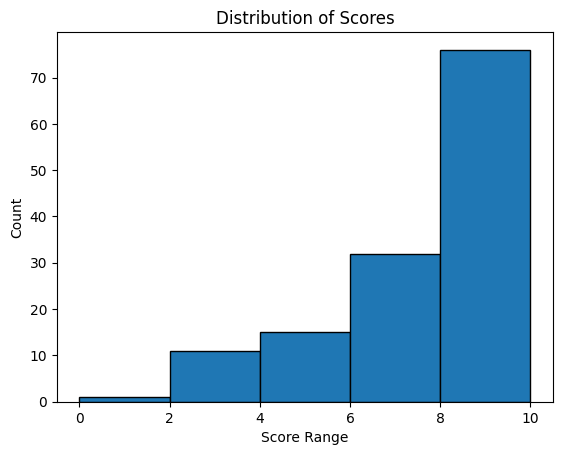

In [ ]:
plt.hist(reordered_data['Score'], bins=range(1, 12), edgecolor='black')
plt.xticks(range(1, 11))
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()

bins = [0, 2, 4, 6, 8, 10] # Buckets for 1-2, 3-4, 5-6, etc.
plt.hist(reordered_data['Score'], bins=bins, edgecolor='black')
plt.xticks(bins)
plt.xlabel('Score Range')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cleaned_data.to_excel('/content/drive/My Drive/Colab Notebooks/cleaned_survey_data.xlsx', index=False)


# **Part 2: Training a model on an Amazon dataset in order to later classify PUR survey data sentiment**

In [ ]:
from google.colab import files
import gzip
import json

uploaded = files.upload()
file_name = list(uploaded.keys())[0]  # Get the name of the uploaded file

data = []

with gzip.open(file_name, "rb") as f:
    for line in f:
        json_line = json.loads(line.decode("utf-8"))
        data.append(json_line)

# Now, 'data' is a list of dictionaries, each containing one JSON object from the file


Saving Software.json.gz to Software.json (2).gz


In [ ]:
import pandas as pd

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('software_reviews.csv', index=False)

# Display the first few rows of the DataFrame
print(df.head())




   overall  verified   reviewTime      reviewerID        asin  \
0      4.0      True  03 11, 2014  A240ORQ2LF9LUI  0077613252   
1      4.0      True  02 23, 2014  A1YCCU0YRLS0FE  0077613252   
2      1.0      True  02 17, 2014  A1BJHRQDYVAY2J  0077613252   
3      3.0      True  02 17, 2014   APRDVZ6QBIQXT  0077613252   
4      5.0     False  10 14, 2013  A2JZTTBSLS1QXV  0077775473   

                        style         reviewerName  \
0  {'Format:': ' Loose Leaf'}           Michelle W   
1  {'Format:': ' Loose Leaf'}  Rosalind White Ames   
2  {'Format:': ' Loose Leaf'}       Allan R. Baker   
3  {'Format:': ' Loose Leaf'}                 Lucy   
4                         NaN            Albert V.   

                                          reviewText  \
0  The materials arrived early and were in excell...   
1  I am really enjoying this book with the worksh...   
2  IF YOU ARE TAKING THIS CLASS DON"T WASTE YOUR ...   
3  This book was missing pages!!! Important pages...   
4  I

In [ ]:
# Save the DataFrame to Google Drive
df.to_csv('/content/drive/My Drive/Colab Notebooks/software_reviews.csv', index=False)